load blob data and make figures

In [1]:
import os 
import copy
import scipy
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import fxsdata
from fxsdata import fxs_mouse

In [2]:
%matplotlib notebook
#%matplotlib inline

In [3]:
num_queries = 7 
query_names = ['PSD-95', 'Synapsin', 'VGluT1', 'VGluT2', 'Gephyrin', 'GAD', 'GS']
region_names = ['F000', 'F001', 'F002', 'F003']
layer_names = ['Layer1', 'Layer2', 'Layer3', 'Layer4']
z_spans = [1, 2, 3]

xticklabels = ['2ss v 3ss', '4ss v 6ss', '5ss v 7ss', '2ss (second) v 1ss']
plot_titles = query_names
row_labels = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

Load data into fxs_mouse objects 

In [4]:
name = '2ss'
fn = '/Users/anish/Documents/yi_mice/excel/2ss_puncta_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
blob_mouse_2ss = fxs_mouse(name)
blob_mouse_2ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '3ss'
fn = '/Users/anish/Documents/yi_mice/excel/3ss_puncta_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'KO'
blob_mouse_3ss = fxs_mouse(name)
blob_mouse_3ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '4ss'
fn = '/Users/anish/Documents/yi_mice/excel/4ss_puncta_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
blob_mouse_4ss = fxs_mouse(name)
blob_mouse_4ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '5ss'
fn = '/Users/anish/Documents/yi_mice/excel/5ss_puncta_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
blob_mouse_5ss = fxs_mouse(name)
blob_mouse_5ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '6ss'
fn = '/Users/anish/Documents/yi_mice/excel/6ss_puncta_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
blob_mouse_6ss = fxs_mouse(name)
blob_mouse_6ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '7ss'
fn = '/Users/anish/Documents/yi_mice/excel/7ss_puncta_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
blob_mouse_7ss = fxs_mouse(name)
blob_mouse_7ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '1ss'
fn = '/Users/anish/Documents/yi_mice/excel/1ss_puncta_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
blob_mouse_1ss = fxs_mouse(name)
blob_mouse_1ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '22ss'
fn = '/Users/anish/Documents/yi_mice/excel/22ss_puncta_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
blob_mouse_22ss = fxs_mouse(name)
blob_mouse_22ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

63 84
42 63
21 42
0 21
63 84
42 63
21 42
0 21
63 84
42 63
21 42
0 21
63 84
42 63
21 42
0 21
0 21
21 42
42 63
63 84
0 21
21 42
42 63
63 84
0 21
21 42
42 63
63 84
63 84
42 63
21 42
0 21


In [5]:
# Add small synapses (1slice-2slice to the calculations)
blob_mouse_2ss = fxsdata.compute_small_synapses(blob_mouse_2ss)
blob_mouse_3ss = fxsdata.compute_small_synapses(blob_mouse_3ss)
blob_mouse_4ss = fxsdata.compute_small_synapses(blob_mouse_4ss)
blob_mouse_5ss = fxsdata.compute_small_synapses(blob_mouse_5ss)
blob_mouse_6ss = fxsdata.compute_small_synapses(blob_mouse_6ss)
blob_mouse_7ss = fxsdata.compute_small_synapses(blob_mouse_7ss)
blob_mouse_1ss = fxsdata.compute_small_synapses(blob_mouse_1ss)
blob_mouse_22ss = fxsdata.compute_small_synapses(blob_mouse_22ss)

# Add medium synapses (1slice-2slice to the calculations)
blob_mouse_2ss = fxsdata.compute_medium_synapses(blob_mouse_2ss)
blob_mouse_3ss = fxsdata.compute_medium_synapses(blob_mouse_3ss)
blob_mouse_4ss = fxsdata.compute_medium_synapses(blob_mouse_4ss)
blob_mouse_5ss = fxsdata.compute_medium_synapses(blob_mouse_5ss)
blob_mouse_6ss = fxsdata.compute_medium_synapses(blob_mouse_6ss)
blob_mouse_7ss = fxsdata.compute_medium_synapses(blob_mouse_7ss)
blob_mouse_1ss = fxsdata.compute_medium_synapses(blob_mouse_1ss)
blob_mouse_22ss = fxsdata.compute_medium_synapses(blob_mouse_22ss)

In [6]:
# Create dataframes 
df_2 = fxsdata.create_df(blob_mouse_2ss, row_labels)
df_3 = fxsdata.create_df(blob_mouse_3ss, row_labels)

df_4 = fxsdata.create_df(blob_mouse_4ss, row_labels)
df_6 = fxsdata.create_df(blob_mouse_6ss, row_labels)

df_5 = fxsdata.create_df(blob_mouse_5ss, row_labels)
df_7 = fxsdata.create_df(blob_mouse_7ss, row_labels)

df_22 = fxsdata.create_df(blob_mouse_22ss, row_labels)
df_1 =  fxsdata.create_df(blob_mouse_1ss, row_labels)

In [7]:
dflist = [df_2, df_3, df_4, df_6, df_5, df_7, df_22, df_1]

In [8]:
row_labels = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

In [9]:
blob_wt_mouse_list = [blob_mouse_2ss, blob_mouse_4ss, blob_mouse_5ss, blob_mouse_22ss]
mouse_name = 'wildtype'
blob_wt_mouse = fxsdata.average_mice(blob_wt_mouse_list, mouse_name, row_labels)

blob_ko_mouse_list = [blob_mouse_3ss, blob_mouse_6ss, blob_mouse_7ss, blob_mouse_1ss]
mouse_name = 'knockout'
blob_ko_mouse = fxsdata.average_mice(blob_ko_mouse_list, mouse_name, row_labels)

In [10]:
query_list = row_labels
#row_labels = ['Q0-PSD', 'Q1-Synapsin', 'Q2-VGluT1', 'Q3-VGluT2', 'Q4-Gephyrin', 'Q5-GAD', 'Q6-GS']

In [11]:
for slicespan in range(0, 4): 
    mouse_name = 'average wildtype, z=' + str(slicespan)
    wt_df = fxsdata.average_mouse_to_df(blob_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average knockout, z=' + str(slicespan)
    ko_df = fxsdata.average_mouse_to_df(blob_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    pval_df = fxsdata.create_pval_df(query_list, slicespan, blob_ko_mouse_list, blob_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(wt_df)
    dflist.append(ko_df)
    dflist.append(pval_df)

## Average layers

In [12]:
len(dflist)

20

In [13]:
row_labels

['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

In [14]:
query_list = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

# Average Layers
avg_layer_mouse_2ss = fxsdata.average_mouse_layers(blob_mouse_2ss, query_list)
avg_layer_mouse_3ss = fxsdata.average_mouse_layers(blob_mouse_3ss, query_list)
avg_layer_mouse_4ss = fxsdata.average_mouse_layers(blob_mouse_4ss, query_list)
avg_layer_mouse_5ss = fxsdata.average_mouse_layers(blob_mouse_5ss, query_list)
avg_layer_mouse_6ss = fxsdata.average_mouse_layers(blob_mouse_6ss, query_list)
avg_layer_mouse_7ss = fxsdata.average_mouse_layers(blob_mouse_7ss, query_list)
avg_layer_mouse_1ss = fxsdata.average_mouse_layers(blob_mouse_1ss, query_list)
avg_layer_mouse_22ss = fxsdata.average_mouse_layers(blob_mouse_22ss, query_list)

query_list

avg_layer_wt_mouse_list = [avg_layer_mouse_2ss, avg_layer_mouse_4ss, avg_layer_mouse_5ss, avg_layer_mouse_22ss]
mouse_name = 'wildtype'
avg_layer_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, query_list)

avg_layer_ko_mouse_list = [avg_layer_mouse_3ss, avg_layer_mouse_6ss, avg_layer_mouse_7ss, avg_layer_mouse_1ss]
mouse_name = 'knockout'
avg_layer_ko_mouse = fxsdata.average_layer_mice(avg_layer_ko_mouse_list, mouse_name, query_list)

layer_key = 'average'
pairkey = 'unpaired'
layer_avg_pval_dict = fxsdata.create_layer_avg_pval_dict(avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, query_list, pairkey)


for slicespan in range(0, 4): 
    mouse_name = 'average layer wildtype, z=' + str(slicespan)
    avg_layer_wt_df = fxsdata.average_layer_mice_to_df(avg_layer_wt_mouse, query_list, slicespan, mouse_name)
    
    mouse_name = 'average layer knockout, z=' + str(slicespan)
    avg_layer_ko_df = fxsdata.average_layer_mice_to_df(avg_layer_ko_mouse, query_list, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    avg_layer_pval_df = fxsdata.create_layer_avg_pval_df(query_list, layer_key, slicespan, avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(avg_layer_wt_df)
    dflist.append(avg_layer_ko_df)
    dflist.append(avg_layer_pval_df)

## Create Blob Figures 
Small blobs, z=2 blobs, z=3 blobs.  All layers averaged

In [15]:
xlabels = ['PSD-95', 'Synapsin', 'VGluT1', 'VGluT2', 'Gephyrin', 'GAD']

In [16]:
query_keys = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']

In [17]:
avg_layer_wt_mouse['Q0']['average_data']['2']

[0.43595354756525606,
 0.43052654006841135,
 0.38520177643192693,
 0.4958071421480635]

In [18]:
avg_layer_ko_mouse['Q4'].keys()

dict_keys(['average', 'average_data', 'average_L1_std_error', 'average_L1', 'average_L4_data', 'average_L1_data', 'average_L4', 'average_L23', 'average_std_error', 'average_L23_std_error', 'average_L4_std_error', 'average_L23_data'])

<IPython.core.display.Javascript object>


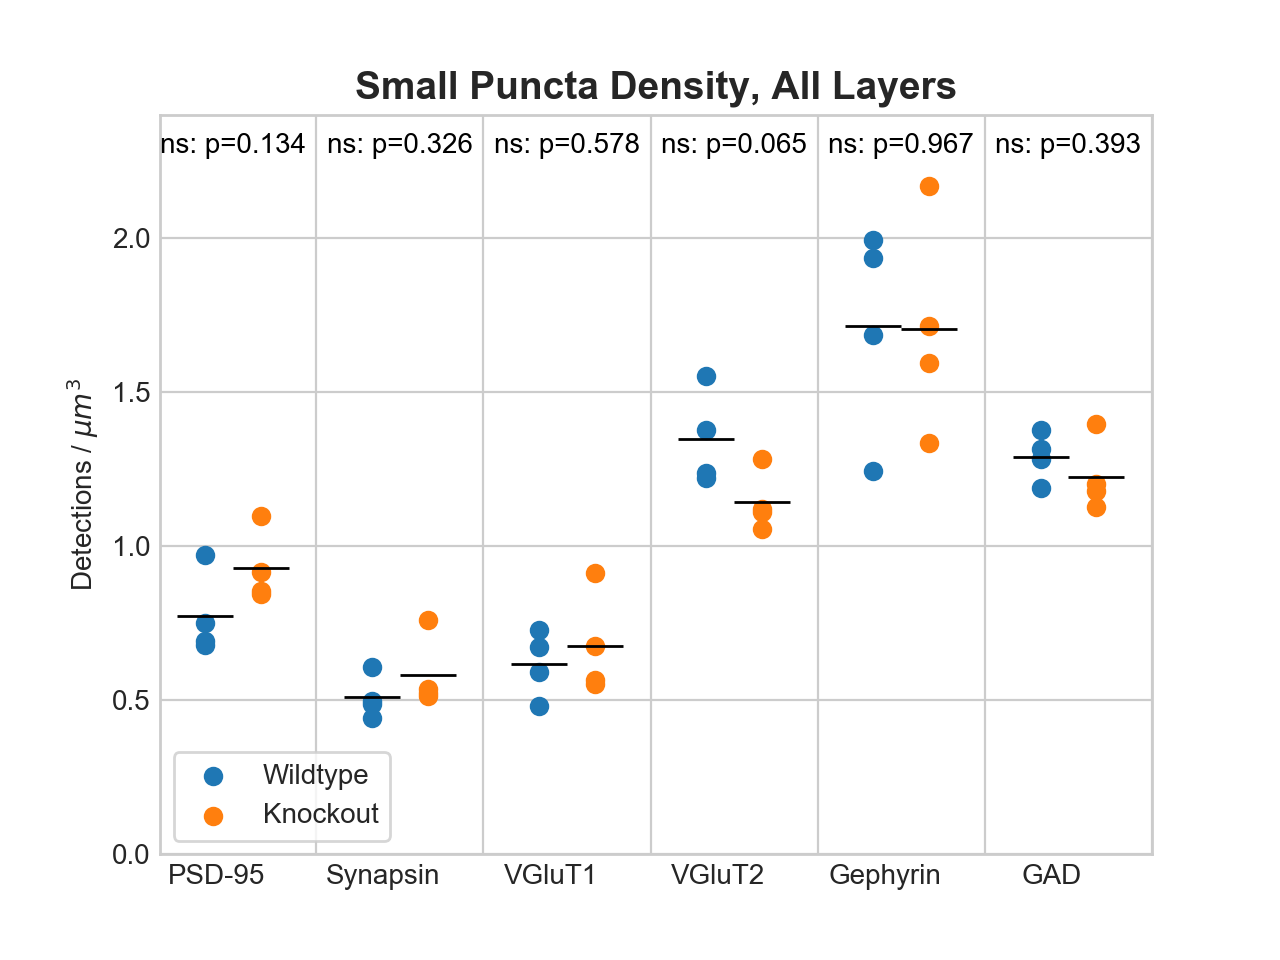

original y 2.170718924345857
y even test:  2.3000000000000003
yvalue:  2.3000000000000003


In [21]:
size_key = '0'

fig = plt.figure()
plt.style.use('seaborn-whitegrid')

x = 0
x_label_locs = [] 
layer_error_key = layer_key + '_std_error'
layer_data_key = layer_key + '_data'

pval_list = [] 
pval_x_list = []
pval_y_list = [] 

for query_key in query_keys: 
    wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
    wt_std_e = avg_layer_wt_mouse[query_key][layer_error_key][size_key]
    p0 = plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
    xlist = np.ones((4, 1))*x
    wt_data = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
    p0 = plt.scatter(xlist, wt_data, color='C0', label='wildtype')

    ko_mean = avg_layer_ko_mouse[query_key][layer_key][size_key]
    ko_std_e = avg_layer_ko_mouse[query_key][layer_error_key][size_key]
    plt.plot(x+1, ko_mean, markersize=20, marker = "_", color='black', label='knockout')
    xlist = np.ones((4, 1))*(x+1)
    ko_data = avg_layer_ko_mouse[query_key][layer_data_key][size_key]
    p1 = plt.scatter(xlist, ko_data, color='C1', label='knockout')

    pval = layer_avg_pval_dict[query_key][layer_key][size_key]
    pval_list.append(pval)
    pval_x_list.append(x+0.5)
    pval_y_list.append(max(max(wt_data), max(ko_data)))

    x_label_locs.append(x+2)
    x = x + 3

ax = plt.gca()
y = max(pval_y_list)
print('original y', y)
delta_y = 0.1
if y < 0.9: 
    delta_y = delta_y/2

y = (np.round(y*10))/10 + delta_y
print('y even test: ', y)
if np.trunc((y*10)*10)/10 % 2 == 0:
    print('y is even')
    y = y + delta_y

print('yvalue: ', y)
for p_n, pval in enumerate(pval_list): 
    pval_str = str(round(pval, 3))
    if pval < 0.05: 
        plt.text(pval_x_list[p_n], y, "* p=" + pval_str, color='red', 
                 verticalalignment='center', horizontalalignment='center')
    else:
        plt.text(pval_x_list[p_n], y, 'ns: p='+pval_str, color='black', 
                 verticalalignment='center', horizontalalignment='center')

plt.title('Small Puncta Density, All Layers', fontsize=14, fontweight='bold')

plt.ylabel('Detections / $\mu m^3$')
plt.xticks(x_label_locs, xlabels) 
plt.legend([p0, p1], ['Wildtype', 'Knockout'], frameon=True, loc='lower left')
y = y + delta_y
ax.set_ylim(0, y)        
dx = -36/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)


plt.savefig('figs/synapse-density-figs/blobdensity_z0.png', dpi=300, bbox_inches='tight', transparent='False')

<IPython.core.display.Javascript object>


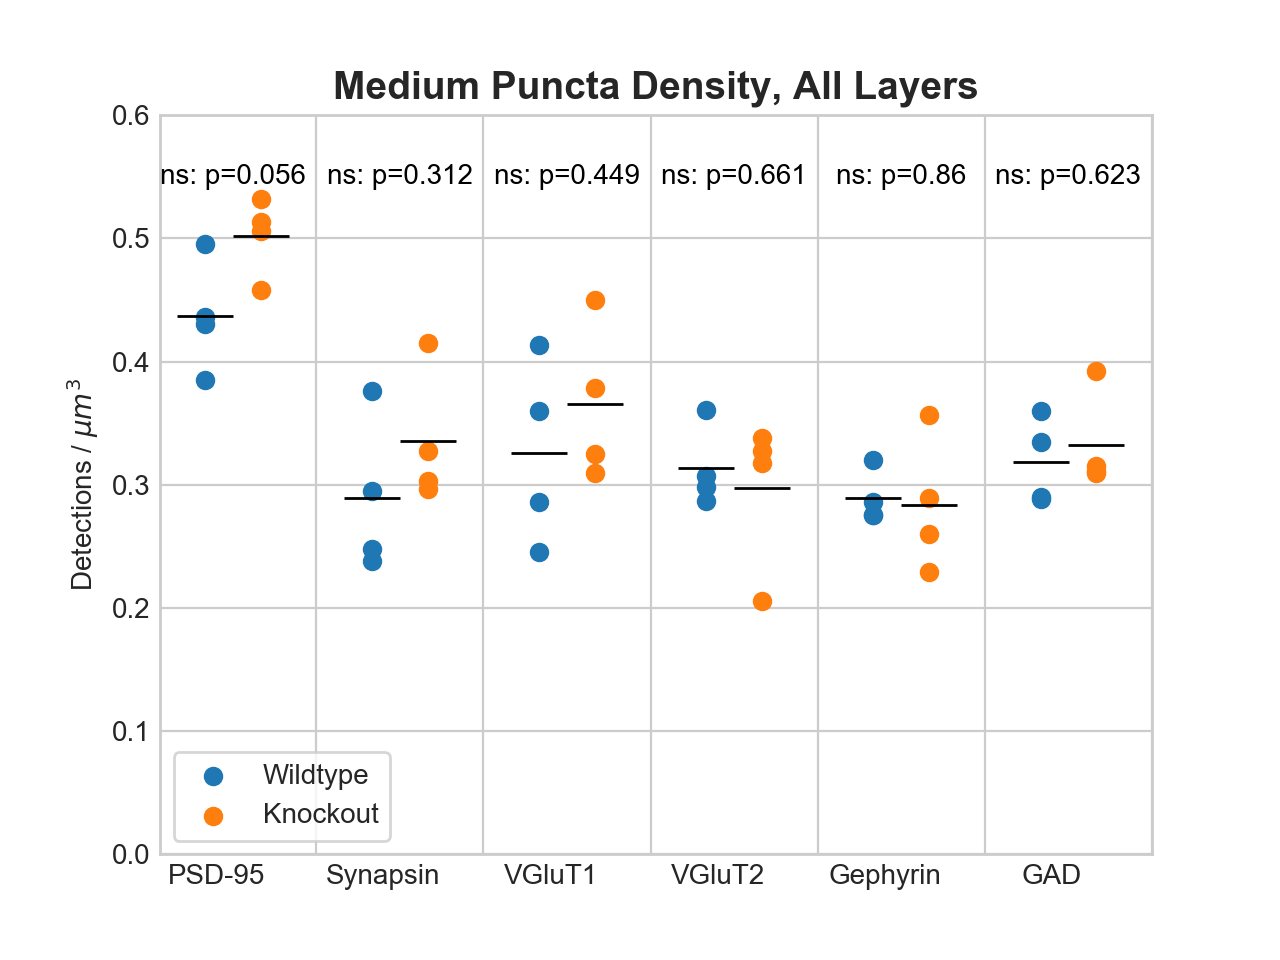

original y 0.5320848058985045
y even test:  0.55
yvalue:  0.55


In [23]:
size_key = '2'
plt.figure()
plt.style.use('seaborn-whitegrid')

x = 0
x_label_locs = [] 
layer_error_key = layer_key + '_std_error'
layer_data_key = layer_key + '_data'

pval_list = [] 
pval_x_list = []
pval_y_list = [] 

for query_key in query_keys: 
    wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
    wt_std_e = avg_layer_wt_mouse[query_key][layer_error_key][size_key]
    p0 = plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
    xlist = np.ones((4, 1))*x
    wt_data = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
    p0 = plt.scatter(xlist, wt_data, color='C0', label='wildtype')

    ko_mean = avg_layer_ko_mouse[query_key][layer_key][size_key]
    ko_std_e = avg_layer_ko_mouse[query_key][layer_error_key][size_key]
    plt.plot(x+1, ko_mean, markersize=20, marker = "_", color='black', label='knockout')
    xlist = np.ones((4, 1))*(x+1)
    ko_data = avg_layer_ko_mouse[query_key][layer_data_key][size_key]
    p1 = plt.scatter(xlist, ko_data, color='C1', label='knockout')

    pval = layer_avg_pval_dict[query_key][layer_key][size_key]
    pval_list.append(pval)
    pval_x_list.append(x+0.5)
    pval_y_list.append(max(max(wt_data), max(ko_data)))

    x_label_locs.append(x+2)
    x = x + 3

ax = plt.gca()
y = max(pval_y_list)
print('original y', y)
delta_y = 0.1
if y < 0.9: 
    delta_y = delta_y/2

y = (np.round(y*10))/10 + delta_y
print('y even test: ', y)
if np.trunc((y*10)*10)/10 % 2 == 0:
    print('y is even')
    y = y + delta_y

print('yvalue: ', y)
for p_n, pval in enumerate(pval_list): 
    pval_str = str(round(pval, 3))
    if pval < 0.05: 
        plt.text(pval_x_list[p_n], y, "* p=" + pval_str, color='red', 
                 verticalalignment='center', horizontalalignment='center')
    else:
        plt.text(pval_x_list[p_n], y, 'ns: p='+pval_str, color='black', 
                 verticalalignment='center', horizontalalignment='center')

        
plt.ylabel('Detections / $\mu m^3$')
plt.xticks(x_label_locs, xlabels) 
plt.legend([p0, p1], ['Wildtype', 'Knockout'], frameon=True, loc='lower left')
y = y + delta_y
ax.set_ylim(0, y)        
dx = -36/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.title('Medium Puncta Density, All Layers', fontsize=14, fontweight='bold')

plt.savefig('figs/synapse-density-figs/blobdensity_z2.png', dpi=300, bbox_inches='tight', transparent='False')

<IPython.core.display.Javascript object>


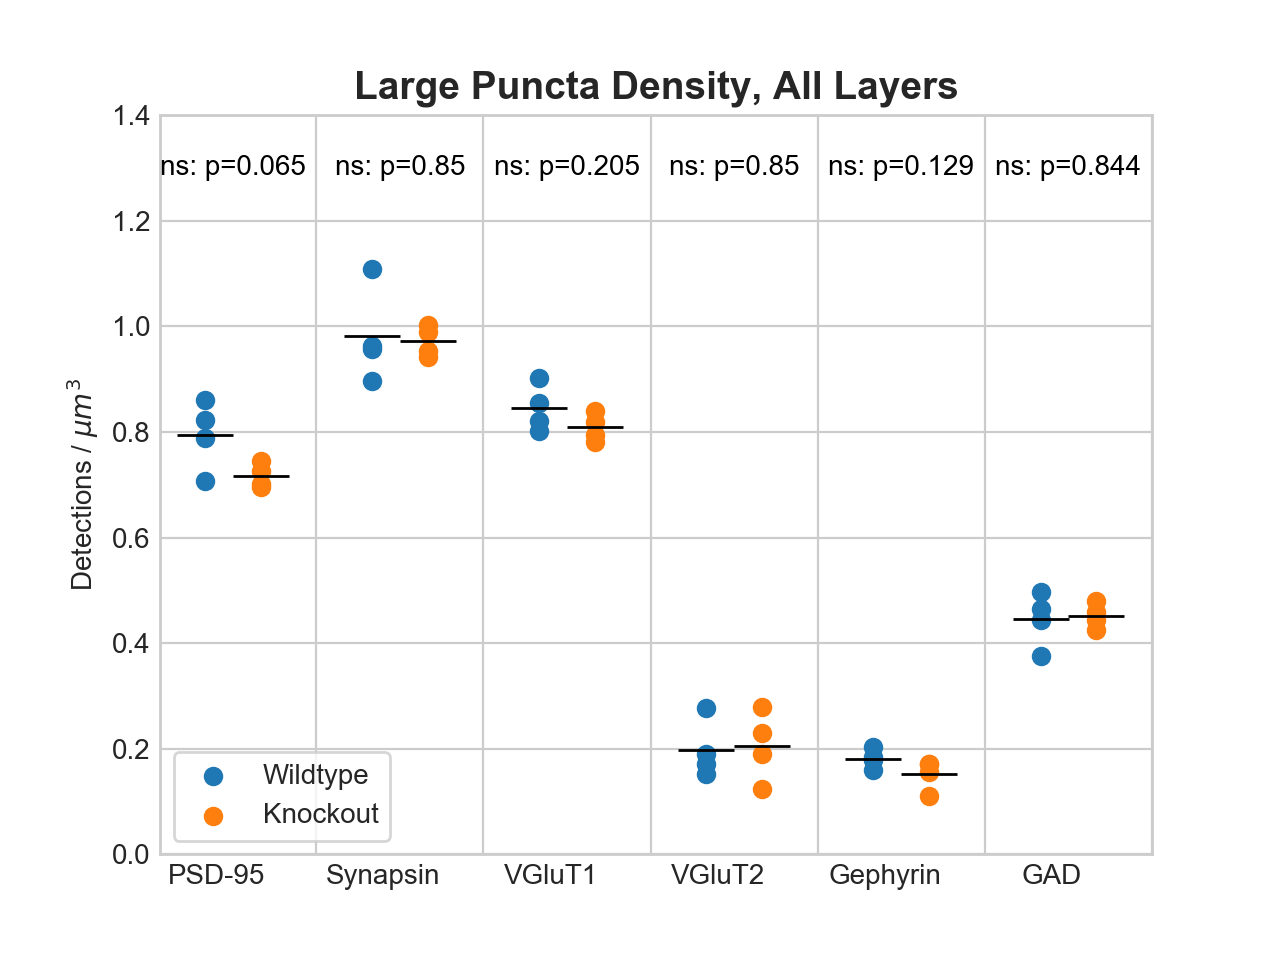

original y 1.1080218590446942
y even test:  1.2000000000000002
y is even
yvalue:  1.3000000000000003


In [24]:
size_key = '3'
plt.figure()
plt.style.use('seaborn-whitegrid')

x = 0
x_label_locs = [] 
layer_error_key = layer_key + '_std_error'
layer_data_key = layer_key + '_data'

pval_list = [] 
pval_x_list = []
pval_y_list = [] 

for query_key in query_keys: 
    wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
    wt_std_e = avg_layer_wt_mouse[query_key][layer_error_key][size_key]
    p0 = plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
    xlist = np.ones((4, 1))*x
    wt_data = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
    p0 = plt.scatter(xlist, wt_data, color='C0', label='wildtype')

    ko_mean = avg_layer_ko_mouse[query_key][layer_key][size_key]
    ko_std_e = avg_layer_ko_mouse[query_key][layer_error_key][size_key]
    plt.plot(x+1, ko_mean, markersize=20, marker = "_", color='black', label='knockout')
    xlist = np.ones((4, 1))*(x+1)
    ko_data = avg_layer_ko_mouse[query_key][layer_data_key][size_key]
    p1 = plt.scatter(xlist, ko_data, color='C1', label='knockout')

    pval = layer_avg_pval_dict[query_key][layer_key][size_key]
    pval_list.append(pval)
    pval_x_list.append(x+0.5)
    pval_y_list.append(max(max(wt_data), max(ko_data)))

    x_label_locs.append(x+2)
    x = x + 3

ax = plt.gca()
y = max(pval_y_list)
print('original y', y)
delta_y = 0.1
if y < 0.9: 
    delta_y = delta_y/2

y = (np.round(y*10))/10 + delta_y
print('y even test: ', y)
if np.trunc((y*10)*10)/10 % 2 == 0:
    print('y is even')
    y = y + delta_y

print('yvalue: ', y)
for p_n, pval in enumerate(pval_list): 
    pval_str = str(round(pval, 3))
    if pval < 0.05: 
        plt.text(pval_x_list[p_n], y, "* p=" + pval_str, color='red', 
                 verticalalignment='center', horizontalalignment='center')
    else:
        plt.text(pval_x_list[p_n], y, 'ns: p='+pval_str, color='black', 
                 verticalalignment='center', horizontalalignment='center')

plt.ylabel('Detections / $\mu m^3$')
plt.xticks(x_label_locs, xlabels) 
plt.legend([p0, p1], ['Wildtype', 'Knockout'], frameon=True, loc='lower left')
y = y + delta_y
ax.set_ylim(0, y)        
dx = -36/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)



plt.title('Large Puncta Density, All Layers', fontsize=14, fontweight='bold')
plt.savefig('figs/synapse-density-figs/blobdensity_z3.png', dpi=300, bbox_inches='tight', transparent='False')

## GS Blob Size Comparison

In [ ]:
fig = plt.figure()

plt.style.use('seaborn-whitegrid')
size_key_list = ['0', '2', '3']
query_key = 'Q6'
xlabels = ['Small Punctum', 'Medium Punctum', 'Large Punctum']
x = 0
x_label_locs = [] 
layer_error_key = layer_key + '_std_error'
layer_data_key = layer_key + '_data'

pval_list = [] 
pval_x_list = []
pval_y_list = [] 
mean_diff_list = [] 

for size_key in size_key_list: 
    wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
    wt_std_e = avg_layer_wt_mouse[query_key][layer_error_key][size_key]
    p0 = plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
    xlist = np.ones((4, 1))*x
    wt_data = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
    p0 = plt.scatter(xlist, wt_data, color='C0', label='wildtype')

    ko_mean = avg_layer_ko_mouse[query_key][layer_key][size_key]
    ko_std_e = avg_layer_ko_mouse[query_key][layer_error_key][size_key]
    plt.plot(x+1, ko_mean, markersize=20, marker = "_", color='black', label='knockout')
    xlist = np.ones((4, 1))*(x+1)
    ko_data = avg_layer_ko_mouse[query_key][layer_data_key][size_key]
    p1 = plt.scatter(xlist, ko_data, color='C1', label='knockout')

    pval = layer_avg_pval_dict[query_key][layer_key][size_key]
    pval_list.append(pval)
    pval_x_list.append(x+0.5)
    pval_y_list.append(max(max(wt_data), max(ko_data)))

    x_label_locs.append(x+2)
    x = x + 3
    mean_diff_list.append(ko_mean - wt_mean)

ax = plt.gca()
y_data = max(pval_y_list)
[y, yticks] = fxsdata.get_yticks(y_data)

for p_n, pval in enumerate(pval_list): 
    pval_str = str(round(pval, 3))
    if pval < 0.05: 
        if (mean_diff_list[p_n] > 0): 
            plt.text(pval_x_list[p_n], y, '*p='+pval_str, color='tab:red', fontsize=14, rotation=0,
                 verticalalignment='center', horizontalalignment='center', fontweight='bold')
        elif (mean_diff_list[p_n] < 0):
            plt.text(pval_x_list[p_n], y, '*p='+pval_str, color='tab:blue', fontsize=14, rotation=0,
                 verticalalignment='center', horizontalalignment='center', fontweight='bold')

    elif pval < 0.1:
        if (mean_diff_list[p_n] > 0): 
            plt.text(pval_x_list[p_n], y, 'p='+pval_str, color='tab:orange', fontsize=14, rotation=0,
                 verticalalignment='center', horizontalalignment='center')
        elif (mean_diff_list[p_n] < 0):
            plt.text(pval_x_list[p_n], y, 'p='+pval_str, color='tab:cyan', fontsize=14, rotation=0,
                 verticalalignment='center', horizontalalignment='center')
    else: 
        plt.text(pval_x_list[p_n], y, 'p='+pval_str, color='black', fontsize=14, rotation=0,
                 verticalalignment='center', horizontalalignment='center')
        
plt.ylabel('Detections / $\mu m^3$', fontsize=14,)
plt.xticks(x_label_locs, xlabels, fontsize=14) 
plt.legend([p0, p1], ['Wildtype', 'Knockout'], frameon=True, loc='lower left')

ax.set_xlim(-1, x-1)        
plt.yticks(yticks, fontsize=14)

dx = -0.8
dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.title('GS Density vs Punctum Size \n All Layers', fontsize=16, fontweight='bold')
plt.savefig('figs/gs-blob-figs/gs_density.png', dpi=300, bbox_inches='tight', transparent='True')

In [ ]:
x_label_locs

## Write to excel sheet

In [ ]:
fxsdata.write_dfs_to_excel(dflist, 'values', 'blobs_medium_unpaired.xlsx')

# Switch to ratios

## Load excitatory synapses

In [ ]:
num_queries = 4 
query_names = ['Synapsin, PSD95', 'Synapsin, VGluT1, PSD95', 'Synapsin, VGluT2, PSD95', 'Synapsin, VGluT1, VGluT2, PSD95']
region_names = ['F000', 'F001', 'F002', 'F003']
layer_names = ['Layer1', 'Layer2', 'Layer3', 'Layer4']
z_spans = [1, 2, 3]
style_name = 'seaborn-whitegrid'
xticklabels = ['2ss v 3ss', '4ss v 6ss', '5ss v 7ss', '2ss (second) v 1ss']
plot_titles = query_names
row_labels = ['Q0', 'Q1', 'Q2', 'Q3']

In [ ]:
name = '2ss'
fn = '/Users/anish/Documents/yi_mice/excel/2ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_2ss = fxs_mouse(name)
mouse_2ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '3ss'
fn = '/Users/anish/Documents/yi_mice/excel/3ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'KO'
mouse_3ss = fxs_mouse(name)
mouse_3ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '4ss'
fn = '/Users/anish/Documents/yi_mice/excel/4ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_4ss = fxs_mouse(name)
mouse_4ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '5ss'
fn = '/Users/anish/Documents/yi_mice/excel/5ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_5ss = fxs_mouse(name)
mouse_5ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '6ss'
fn = '/Users/anish/Documents/yi_mice/excel/6ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_6ss = fxs_mouse(name)
mouse_6ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '7ss'
fn = '/Users/anish/Documents/yi_mice/excel/7ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_7ss = fxs_mouse(name)
mouse_7ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '1ss'
fn = '/Users/anish/Documents/yi_mice/excel/1ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_1ss = fxs_mouse(name)
mouse_1ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

name = '22ss'
fn = '/Users/anish/Documents/yi_mice/excel/22ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_22ss = fxs_mouse(name)
mouse_22ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)

In [ ]:
# Q3 in the speadsheet is the inhibitory query. The following code switches it to the last excitatory query

In [ ]:
fn = '/Users/anish/Documents/yi_mice/excel/2ss_fragX_vglut.xlsx'
layer_order = 'backward'
mouse_2ss = fxsdata.update_mouse(mouse_2ss, fn, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/3ss_fragX_vglut.xlsx'
layer_order = 'backward'
mouse_3ss = fxsdata.update_mouse(mouse_3ss, fn, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/4ss_fragX_vglut.xlsx'
layer_order = 'backward'
mouse_4ss = fxsdata.update_mouse(mouse_4ss, fn, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/5ss_fragX_vglut.xlsx'
layer_order = 'backward'
mouse_5ss = fxsdata.update_mouse(mouse_5ss, fn, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/6ss_fragX_vglut.xlsx'
layer_order = 'forward'
mouse_6ss = fxsdata.update_mouse(mouse_6ss, fn, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/7ss_fragX_vglut.xlsx'
layer_order = 'forward'
mouse_7ss = fxsdata.update_mouse(mouse_7ss, fn, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/1ss_fragX_vglut.xlsx'
layer_order = 'forward'
mouse_1ss = fxsdata.update_mouse(mouse_1ss, fn, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/22ss_fragX_vglut.xlsx'
layer_order = 'backward'
mouse_22ss = fxsdata.update_mouse(mouse_22ss, fn, layer_order)

In [ ]:
# Add small synapses (1slice-2slice to the calculations)
mouse_2ss = fxsdata.compute_small_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_small_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_small_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_small_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_small_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_small_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_small_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_small_synapses(mouse_22ss)



# Add medium synapses (1slice-2slice to the calculations)
mouse_2ss = fxsdata.compute_medium_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_medium_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_medium_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_medium_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_medium_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_medium_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_medium_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_medium_synapses(mouse_22ss)



In [ ]:
query_list = row_labels

In [ ]:
row_labels

In [ ]:
queryID = 'q0' #PSD-95

ratio_mouse_1ss = fxsdata.divide_mouse_by_query(mouse_1ss, blob_mouse_1ss, queryID)
ratio_mouse_2ss = fxsdata.divide_mouse_by_query(mouse_2ss, blob_mouse_2ss, queryID)
ratio_mouse_3ss = fxsdata.divide_mouse_by_query(mouse_3ss, blob_mouse_3ss, queryID)
ratio_mouse_4ss = fxsdata.divide_mouse_by_query(mouse_4ss, blob_mouse_4ss, queryID)
ratio_mouse_5ss = fxsdata.divide_mouse_by_query(mouse_5ss, blob_mouse_5ss, queryID)
ratio_mouse_6ss = fxsdata.divide_mouse_by_query(mouse_6ss, blob_mouse_6ss, queryID)
ratio_mouse_7ss = fxsdata.divide_mouse_by_query(mouse_7ss, blob_mouse_7ss, queryID)
ratio_mouse_22ss = fxsdata.divide_mouse_by_query(mouse_22ss, blob_mouse_22ss, queryID)

# Create dataframes 
df_2 = fxsdata.create_ratio_df(ratio_mouse_2ss, row_labels)
df_3 = fxsdata.create_ratio_df(ratio_mouse_3ss, row_labels)

df_4 = fxsdata.create_ratio_df(ratio_mouse_4ss, row_labels)
df_6 = fxsdata.create_ratio_df(ratio_mouse_6ss, row_labels)

df_5 = fxsdata.create_ratio_df(ratio_mouse_5ss, row_labels)
df_7 = fxsdata.create_ratio_df(ratio_mouse_7ss, row_labels)

df_22 = fxsdata.create_ratio_df(ratio_mouse_22ss, row_labels)
df_1 =  fxsdata.create_ratio_df(ratio_mouse_1ss, row_labels)

dflist = [df_2, df_3, df_4, df_6, df_5, df_7, df_22, df_1]

ratio_wt_mouse_list = [ratio_mouse_2ss, ratio_mouse_4ss, ratio_mouse_5ss, ratio_mouse_22ss]
mouse_name = 'wildtype'
ratio_wt_mouse = fxsdata.average_mice(ratio_wt_mouse_list, mouse_name, row_labels)

ratio_ko_mouse_list = [ratio_mouse_3ss, ratio_mouse_6ss, ratio_mouse_7ss, ratio_mouse_1ss]
mouse_name = 'knockout'
ratio_ko_mouse = fxsdata.average_mice(ratio_ko_mouse_list, mouse_name, row_labels)

for slicespan in range(0, 4): 
    mouse_name = 'average wildtype, z=' + str(slicespan)
    wt_df = fxsdata.average_mouse_to_df(ratio_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average knockout, z=' + str(slicespan)
    ko_df = fxsdata.average_mouse_to_df(ratio_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    pval_df = fxsdata.create_pval_df(query_list, slicespan, ratio_ko_mouse_list, ratio_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(wt_df)
    dflist.append(ko_df)
    dflist.append(pval_df)
    
    
    
query_list = ['Q0', 'Q1', 'Q2', 'Q3']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_ratio_mouse_2ss = fxsdata.average_mouse_layers(ratio_mouse_1ss, query_list)
avg_ratio_mouse_3ss = fxsdata.average_mouse_layers(ratio_mouse_3ss, query_list)
avg_ratio_mouse_4ss = fxsdata.average_mouse_layers(ratio_mouse_4ss, query_list)
avg_ratio_mouse_5ss = fxsdata.average_mouse_layers(ratio_mouse_5ss, query_list)
avg_ratio_mouse_6ss = fxsdata.average_mouse_layers(ratio_mouse_6ss, query_list)
avg_ratio_mouse_7ss = fxsdata.average_mouse_layers(ratio_mouse_7ss, query_list)
avg_ratio_mouse_1ss = fxsdata.average_mouse_layers(ratio_mouse_1ss, query_list)
avg_ratio_mouse_22ss = fxsdata.average_mouse_layers(ratio_mouse_22ss, query_list)

avg_ratio_wt_mouse_list = [avg_ratio_mouse_2ss, avg_ratio_mouse_4ss, avg_ratio_mouse_5ss, avg_ratio_mouse_22ss]
mouse_name = 'wildtype'
avg_ratio_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, row_labels)

avg_ratio_ko_mouse_list = [avg_ratio_mouse_3ss, avg_ratio_mouse_6ss, avg_ratio_mouse_7ss, avg_ratio_mouse_1ss]
mouse_name = 'knockout'
avg_ratio_ko_mouse = fxsdata.average_layer_mice(avg_ratio_ko_mouse_list, mouse_name, row_labels)

layer_key = 'average'

for slicespan in range(0, 4): 
    mouse_name = 'average layer wildtype, z=' + str(slicespan)
    avg_ratio_wt_df = fxsdata.average_layer_mice_to_df(avg_ratio_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average layer knockout, z=' + str(slicespan)
    avg_ratio_ko_df = fxsdata.average_layer_mice_to_df(avg_ratio_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    avg_ratio_pval_df = fxsdata.create_layer_avg_pval_df(query_list, layer_key, slicespan, avg_ratio_ko_mouse_list, avg_ratio_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(avg_ratio_wt_df)
    dflist.append(avg_ratio_ko_df)
    dflist.append(avg_ratio_pval_df)
    
    
    

fxsdata.write_dfs_to_excel(dflist, 'values', 'PSD_excit_med_ratio_unpaired.xlsx')


In [ ]:
#VGLUT1

queryID = 'q2'

ratio_mouse_1ss = fxsdata.divide_mouse_by_query(mouse_1ss, blob_mouse_1ss, queryID)
ratio_mouse_2ss = fxsdata.divide_mouse_by_query(mouse_2ss, blob_mouse_2ss, queryID)
ratio_mouse_3ss = fxsdata.divide_mouse_by_query(mouse_3ss, blob_mouse_3ss, queryID)
ratio_mouse_4ss = fxsdata.divide_mouse_by_query(mouse_4ss, blob_mouse_4ss, queryID)
ratio_mouse_5ss = fxsdata.divide_mouse_by_query(mouse_5ss, blob_mouse_5ss, queryID)
ratio_mouse_6ss = fxsdata.divide_mouse_by_query(mouse_6ss, blob_mouse_6ss, queryID)
ratio_mouse_7ss = fxsdata.divide_mouse_by_query(mouse_7ss, blob_mouse_7ss, queryID)
ratio_mouse_22ss = fxsdata.divide_mouse_by_query(mouse_22ss, blob_mouse_22ss, queryID)

# Create dataframes 
df_2 = fxsdata.create_ratio_df(ratio_mouse_2ss, row_labels)
df_3 = fxsdata.create_ratio_df(ratio_mouse_3ss, row_labels)

df_4 = fxsdata.create_ratio_df(ratio_mouse_4ss, row_labels)
df_6 = fxsdata.create_ratio_df(ratio_mouse_6ss, row_labels)

df_5 = fxsdata.create_ratio_df(ratio_mouse_5ss, row_labels)
df_7 = fxsdata.create_ratio_df(ratio_mouse_7ss, row_labels)

df_22 = fxsdata.create_ratio_df(ratio_mouse_22ss, row_labels)
df_1 =  fxsdata.create_ratio_df(ratio_mouse_1ss, row_labels)

dflist = [df_2, df_3, df_4, df_6, df_5, df_7, df_22, df_1]

ratio_wt_mouse_list = [ratio_mouse_2ss, ratio_mouse_4ss, ratio_mouse_5ss, ratio_mouse_22ss]
mouse_name = 'wildtype'
ratio_wt_mouse = fxsdata.average_mice(ratio_wt_mouse_list, mouse_name, row_labels)

ratio_ko_mouse_list = [ratio_mouse_3ss, ratio_mouse_6ss, ratio_mouse_7ss, ratio_mouse_1ss]
mouse_name = 'knockout'
ratio_ko_mouse = fxsdata.average_mice(ratio_ko_mouse_list, mouse_name, row_labels)

for slicespan in range(0, 4): 
    mouse_name = 'average wildtype, z=' + str(slicespan)
    wt_df = fxsdata.average_mouse_to_df(ratio_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average knockout, z=' + str(slicespan)
    ko_df = fxsdata.average_mouse_to_df(ratio_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    pval_df = fxsdata.create_pval_df(query_list, slicespan, ratio_ko_mouse_list, ratio_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(wt_df)
    dflist.append(ko_df)
    dflist.append(pval_df)

    
    
    
query_list = ['Q0', 'Q1', 'Q2', 'Q3']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_ratio_mouse_2ss = fxsdata.average_mouse_layers(ratio_mouse_1ss, query_list)
avg_ratio_mouse_3ss = fxsdata.average_mouse_layers(ratio_mouse_3ss, query_list)
avg_ratio_mouse_4ss = fxsdata.average_mouse_layers(ratio_mouse_4ss, query_list)
avg_ratio_mouse_5ss = fxsdata.average_mouse_layers(ratio_mouse_5ss, query_list)
avg_ratio_mouse_6ss = fxsdata.average_mouse_layers(ratio_mouse_6ss, query_list)
avg_ratio_mouse_7ss = fxsdata.average_mouse_layers(ratio_mouse_7ss, query_list)
avg_ratio_mouse_1ss = fxsdata.average_mouse_layers(ratio_mouse_1ss, query_list)
avg_ratio_mouse_22ss = fxsdata.average_mouse_layers(ratio_mouse_22ss, query_list)

avg_ratio_wt_mouse_list = [avg_ratio_mouse_2ss, avg_ratio_mouse_4ss, avg_ratio_mouse_5ss, avg_ratio_mouse_22ss]
mouse_name = 'wildtype'
avg_ratio_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, row_labels)

avg_ratio_ko_mouse_list = [avg_ratio_mouse_3ss, avg_ratio_mouse_6ss, avg_ratio_mouse_7ss, avg_ratio_mouse_1ss]
mouse_name = 'knockout'
avg_ratio_ko_mouse = fxsdata.average_layer_mice(avg_ratio_ko_mouse_list, mouse_name, row_labels)

layer_key = 'average'

for slicespan in range(0, 4): 
    mouse_name = 'average layer wildtype, z=' + str(slicespan)
    avg_ratio_wt_df = fxsdata.average_layer_mice_to_df(avg_ratio_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average layer knockout, z=' + str(slicespan)
    avg_ratio_ko_df = fxsdata.average_layer_mice_to_df(avg_ratio_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    avg_ratio_pval_df = fxsdata.create_layer_avg_pval_df(query_list, layer_key, slicespan, avg_ratio_ko_mouse_list, avg_ratio_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(avg_ratio_wt_df)
    dflist.append(avg_ratio_ko_df)
    dflist.append(avg_ratio_pval_df)
    
    
    

    
    
fxsdata.write_dfs_to_excel(dflist, 'values', 'VGLUT1_excit_med_ratio_unpaired.xlsx')


In [ ]:
#VGLUT2

queryID = 'q3'

ratio_mouse_1ss = fxsdata.divide_mouse_by_query(mouse_1ss, blob_mouse_1ss, queryID)
ratio_mouse_2ss = fxsdata.divide_mouse_by_query(mouse_2ss, blob_mouse_2ss, queryID)
ratio_mouse_3ss = fxsdata.divide_mouse_by_query(mouse_3ss, blob_mouse_3ss, queryID)
ratio_mouse_4ss = fxsdata.divide_mouse_by_query(mouse_4ss, blob_mouse_4ss, queryID)
ratio_mouse_5ss = fxsdata.divide_mouse_by_query(mouse_5ss, blob_mouse_5ss, queryID)
ratio_mouse_6ss = fxsdata.divide_mouse_by_query(mouse_6ss, blob_mouse_6ss, queryID)
ratio_mouse_7ss = fxsdata.divide_mouse_by_query(mouse_7ss, blob_mouse_7ss, queryID)
ratio_mouse_22ss = fxsdata.divide_mouse_by_query(mouse_22ss, blob_mouse_22ss, queryID)

# Create dataframes 
df_2 = fxsdata.create_ratio_df(ratio_mouse_2ss, row_labels)
df_3 = fxsdata.create_ratio_df(ratio_mouse_3ss, row_labels)

df_4 = fxsdata.create_ratio_df(ratio_mouse_4ss, row_labels)
df_6 = fxsdata.create_ratio_df(ratio_mouse_6ss, row_labels)

df_5 = fxsdata.create_ratio_df(ratio_mouse_5ss, row_labels)
df_7 = fxsdata.create_ratio_df(ratio_mouse_7ss, row_labels)

df_22 = fxsdata.create_ratio_df(ratio_mouse_22ss, row_labels)
df_1 =  fxsdata.create_ratio_df(ratio_mouse_1ss, row_labels)

dflist = [df_2, df_3, df_4, df_6, df_5, df_7, df_22, df_1]

ratio_wt_mouse_list = [ratio_mouse_2ss, ratio_mouse_4ss, ratio_mouse_5ss, ratio_mouse_22ss]
mouse_name = 'wildtype'
ratio_wt_mouse = fxsdata.average_mice(ratio_wt_mouse_list, mouse_name, row_labels)

ratio_ko_mouse_list = [ratio_mouse_3ss, ratio_mouse_6ss, ratio_mouse_7ss, ratio_mouse_1ss]
mouse_name = 'knockout'
ratio_ko_mouse = fxsdata.average_mice(ratio_ko_mouse_list, mouse_name, row_labels)

for slicespan in range(0, 4): 
    mouse_name = 'average wildtype, z=' + str(slicespan)
    wt_df = fxsdata.average_mouse_to_df(ratio_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average knockout, z=' + str(slicespan)
    ko_df = fxsdata.average_mouse_to_df(ratio_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    pval_df = fxsdata.create_pval_df(query_list, slicespan, ratio_ko_mouse_list, ratio_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(wt_df)
    dflist.append(ko_df)
    dflist.append(pval_df)

    
    
query_list = ['Q0', 'Q1', 'Q2', 'Q3']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_ratio_mouse_2ss = fxsdata.average_mouse_layers(ratio_mouse_1ss, query_list)
avg_ratio_mouse_3ss = fxsdata.average_mouse_layers(ratio_mouse_3ss, query_list)
avg_ratio_mouse_4ss = fxsdata.average_mouse_layers(ratio_mouse_4ss, query_list)
avg_ratio_mouse_5ss = fxsdata.average_mouse_layers(ratio_mouse_5ss, query_list)
avg_ratio_mouse_6ss = fxsdata.average_mouse_layers(ratio_mouse_6ss, query_list)
avg_ratio_mouse_7ss = fxsdata.average_mouse_layers(ratio_mouse_7ss, query_list)
avg_ratio_mouse_1ss = fxsdata.average_mouse_layers(ratio_mouse_1ss, query_list)
avg_ratio_mouse_22ss = fxsdata.average_mouse_layers(ratio_mouse_22ss, query_list)

avg_ratio_wt_mouse_list = [avg_ratio_mouse_2ss, avg_ratio_mouse_4ss, avg_ratio_mouse_5ss, avg_ratio_mouse_22ss]
mouse_name = 'wildtype'
avg_ratio_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, row_labels)

avg_ratio_ko_mouse_list = [avg_ratio_mouse_3ss, avg_ratio_mouse_6ss, avg_ratio_mouse_7ss, avg_ratio_mouse_1ss]
mouse_name = 'knockout'
avg_ratio_ko_mouse = fxsdata.average_layer_mice(avg_ratio_ko_mouse_list, mouse_name, row_labels)

layer_key = 'average'

for slicespan in range(0, 4): 
    mouse_name = 'average layer wildtype, z=' + str(slicespan)
    avg_ratio_wt_df = fxsdata.average_layer_mice_to_df(avg_ratio_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average layer knockout, z=' + str(slicespan)
    avg_ratio_ko_df = fxsdata.average_layer_mice_to_df(avg_ratio_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    avg_ratio_pval_df = fxsdata.create_layer_avg_pval_df(query_list, layer_key, slicespan, avg_ratio_ko_mouse_list, avg_ratio_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(avg_ratio_wt_df)
    dflist.append(avg_ratio_ko_df)
    dflist.append(avg_ratio_pval_df)
    
    
    
    
fxsdata.write_dfs_to_excel(dflist, 'values', 'VGLUT2_excit_med_ratio_unpaired.xlsx')
